# <font style >

<font style = 'color:green; font-size:30px; font-weight: bold'>Forecast Rent Value</font>

<br>
<font color= 'red' style='font-size: 30px'>1.2 About Dataset</font>
<hr style = 'border: 1px solid red'>

### Description:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o preço de alugguel de uma determinada casa (Y). No final do projeto teremos um modelo de previsão para os valores de alugueis. Assim poderemos implementar nosso modelo em uma API.</p>

### Data:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>city</b> - Cidade onde se localiza a casa</li>
    <li><b>area</b> - Área da casa (metros quadrados)</li>
    <li><b>rooms</b> - Quantidade de quartos na casa</li>
    <li><b>bathroom</b> - Quantidade de banheiros na casa</li>
    <li><b>parking spaces</b> - Espaço para garagem, sendo 1 para sim e 0 para não</li>
    <li><b>floor</b> - Andas do edificio</li>
    <li><b>animal</b> - Aceita animal, sendo 1 para sim e 0 para não</li>
    <li><b>furniture</b> -  Se a casa está mobilhada </li>
    <li><b>hoa (RS) </b> -  Valor de condominio</li>
    <li><b>rent amount (RS)</b> -  Valor de Aluguel </li>
    <li><b>property tax (RS)</b> - Valor de IPTU</li>
    <li><b>fire insurance (RS)</b> - Valor do seguro de incêndio </li>
    <li><b>total (RS)</b> -  Valor total de aluguel</li>
</ul>

<br>
<font color= 'red' style='font-size: 30px'>1.3 Importing libraries and Reading data</font>
<hr style = 'border: 1px solid red'>

In [1]:
# Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning 
from sklearn.tree import DecisionTreeRegressor


import warnings 
warnings.filterwarnings('ignore')

# Setting pandas
pd.set_option('display.max_columns', None)

# setting matplotlib
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

In [2]:
data = pd.read_csv('house_data.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [3]:
data.shape

(10692, 13)

<br>
<font color= 'red' style='font-size: 30px'>1.4 Exploratory Data</font>
<hr style = 'border: 1px solid red'>

## Removing columns

> The Columns fire insurance and total not make sense in this project

In [4]:
data.drop(['fire insurance (R$)', 'total (R$)'], axis = 1, inplace = True)
print(data.shape)
data.head()

(10692, 11)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


## Missing values

In [5]:
data.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

## Unique Fields

In [6]:
data.nunique().sort_values(ascending=False)

hoa (R$)             1679
property tax (R$)    1243
rent amount (R$)     1195
area                  517
floor                  35
rooms                  11
parking spaces         11
bathroom               10
city                    5
animal                  2
furniture               2
dtype: int64

## Data info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [8]:
data.dtypes.value_counts()

int64     7
object    4
dtype: int64

## Data describe

In [9]:
data.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000


<br>
<font color= 'blue' style='font-size: 20px'>1.4.2 EDA</font>
<hr style = 'border: 1px solid blue'>

## Type Columns Filter

In [10]:
categorical_columns = data.columns[data.dtypes == object]
numerics_columns = data.columns[data.dtypes != object]

In [11]:
categorical_columns

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [12]:
numerics_columns

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)'],
      dtype='object')

## Categorical Fields

In [13]:
for col in categorical_columns:
    # Doing analysis
    analysis = data[col].value_counts(normalize = True).round(4) * 100
    
    # showing analysis
    print(f'--- {col} ---\n{analysis}\n')

--- city ---
São Paulo         55.06
Rio de Janeiro    14.04
Belo Horizonte    11.77
Porto Alegre      11.16
Campinas           7.98
Name: city, dtype: float64

--- floor ---
-      23.02
1      10.11
2       9.21
3       8.71
4       7.00
5       5.61
6       5.04
7       4.65
8       4.58
9       3.45
10      3.34
11      2.83
12      2.40
13      1.87
14      1.59
15      1.37
16      1.02
17      0.90
18      0.70
19      0.50
20      0.41
21      0.39
25      0.23
23      0.23
22      0.22
26      0.19
24      0.18
27      0.07
28      0.06
29      0.05
32      0.02
35      0.01
46      0.01
301     0.01
51      0.01
Name: floor, dtype: float64

--- animal ---
acept        77.78
not acept    22.22
Name: animal, dtype: float64

--- furniture ---
not furnished    75.63
furnished        24.37
Name: furniture, dtype: float64



### Correction data 

#### Floor

In [14]:
# Fitting floor number
data.loc[data['floor'] == '301']
data.iloc[2562, 5] = 30

In [15]:
data.loc[data['floor'] == '301']

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)


In [16]:
# Fitting "-"
data['floor'] = data['floor'].apply(lambda register : 0 if register == '-' else register)

#### Transform dtype of the floor for numeric

In [17]:
data['floor'] = pd.to_numeric(data['floor'])
categorical_columns = data.columns[data.dtypes == object]
categorical_columns

Index(['city', 'animal', 'furniture'], dtype='object')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  int64 
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 919.0+ KB


## Numerics Fields

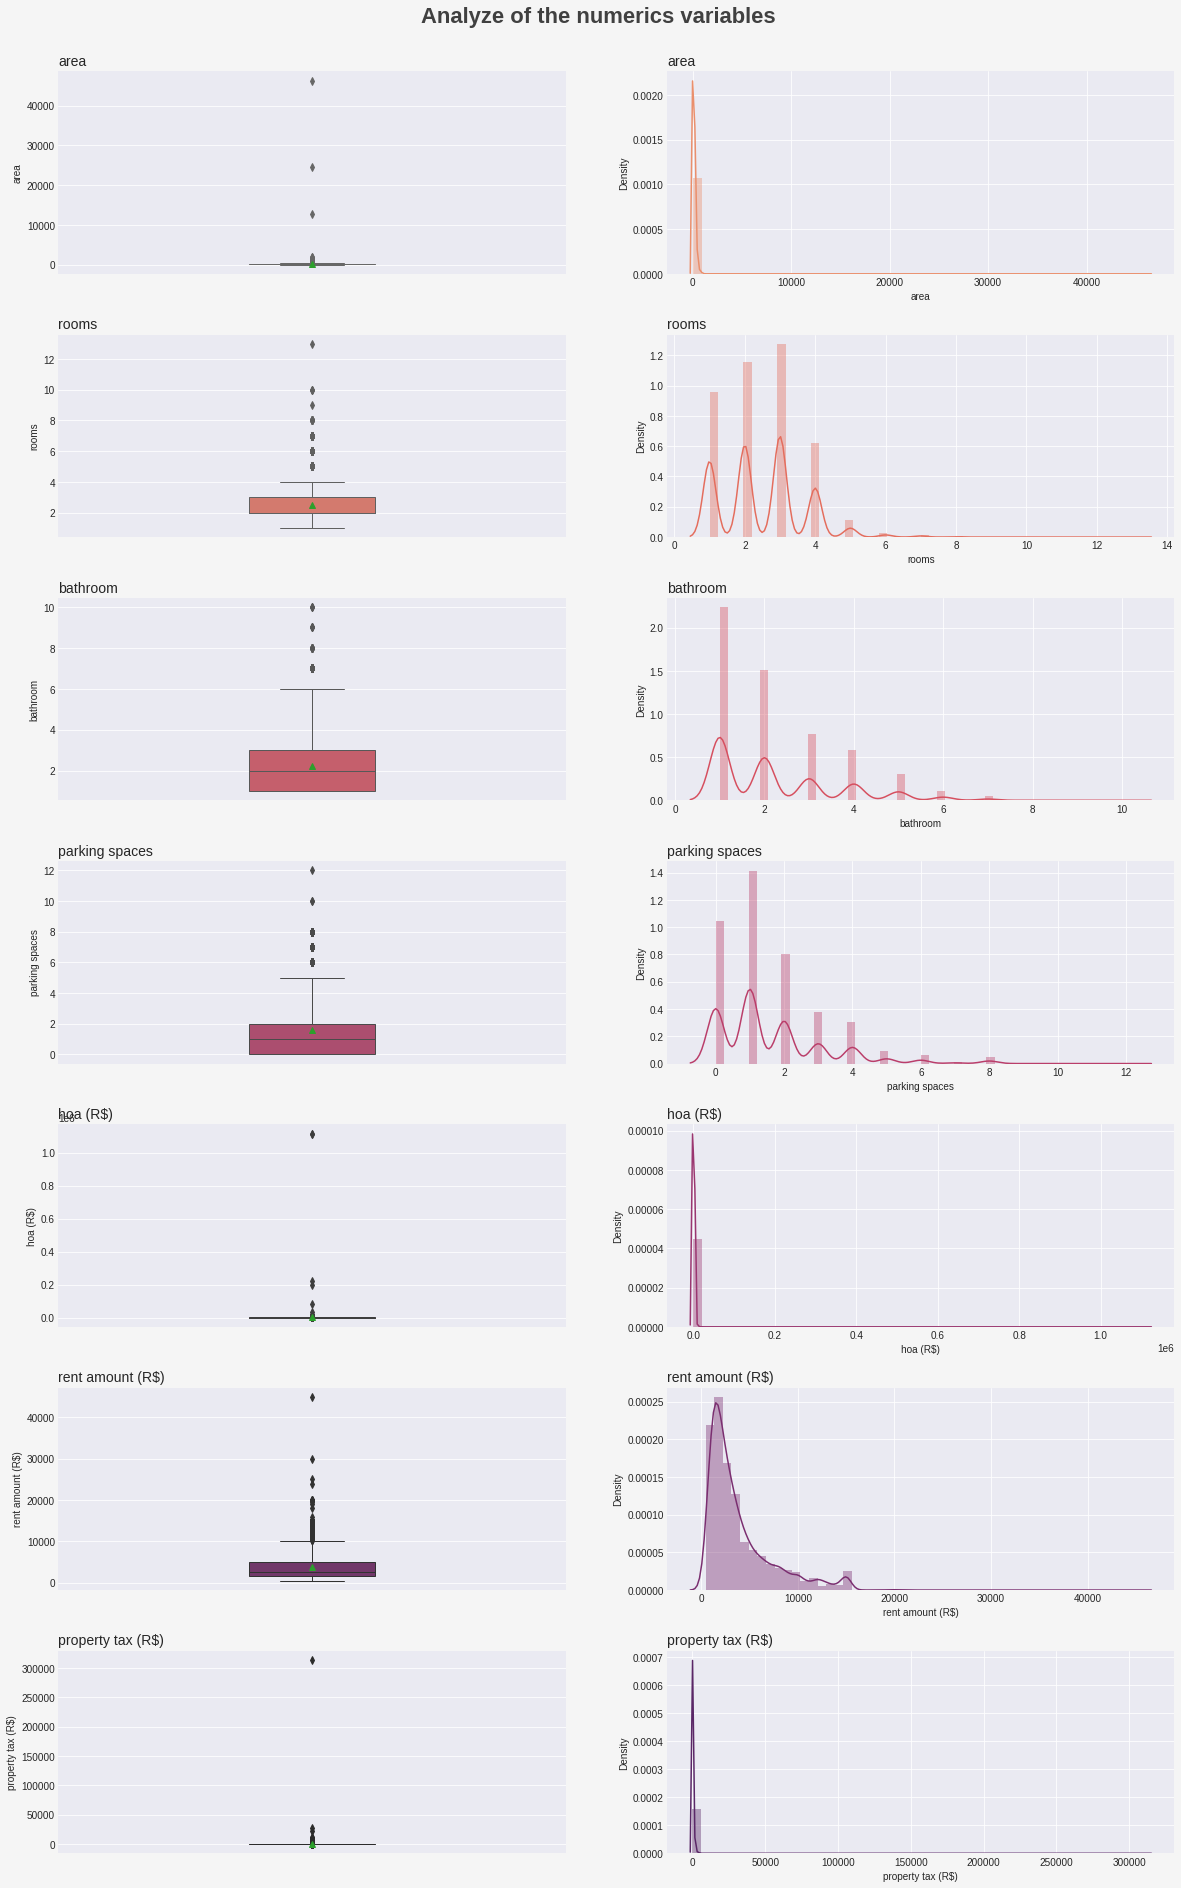

In [19]:
# GRID

# lenght
fig, ax = plt.subplots(figsize = (20, 30))

# background color 
background_color = '#f5f5f5'
fig.set_facecolor(background_color)

# color palette
color_palette = sns.color_palette('flare', len(numerics_columns) * 2)

# Title
plt.suptitle('Analyze of the numerics variables', fontsize = 22, color = '#404040', fontweight = 600)

# Structure

rows = 7 # all numeric information
cols = 2 # (boxplot, distplot)
position = 1 # starting position 


# Loop for plot graphics
for column in numerics_columns:
    
    # -------------- Plot in grid -- Boxplot --------------
    plt.subplot(rows, cols, position)
    
    # Title
    plt.title(f'{column}', loc = 'left', fontsize = 14, fontweight = 200)
    
    # Plot
    sns.boxplot(
        data = data,
        y = column,
        showmeans = True,
        saturation = 0.75,
        linewidth = 1,
        color = color_palette[position],
        width = 0.25
    )
    
    # Changing position
    position += 1
    
    
    # -------------- Plot in grid -- Distplot --------------
    plt.subplot(rows, cols, position)
        
    # Title
    plt.title(f'{column}', loc = 'left', fontsize = 14, fontweight = 200)

    # Plot
    sns.distplot(data[column], color = color_palette[position - 1])  
    
    # Changing position
    position += 1

# grid adjustment
plt.subplots_adjust(top = 0.95, hspace = 0.30)

In [20]:
data.query('area <= 10000', inplace = True)
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279


In [21]:
data = data[data['hoa (R$)'] <= 10000]
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279


In [22]:
data = data[data['rent amount (R$)'] <= 40000]
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25
...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279


<br>
<font color= 'blue' style='font-size: 20px'>1.4.3 Analyzing the features</font>
<hr style = 'border: 1px solid blue'>

## Adjustment of the categorical columns

In [23]:
categorical_columns

Index(['city', 'animal', 'furniture'], dtype='object')

In [24]:
data['animal'] = data['animal'].map({'acept': 1, 'not acept': 0})
data['furniture'] = data['furniture'].map({'furnished': 1, 'not furnished': 0})
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22
4,São Paulo,25,1,1,0,1,0,0,0,800,25


## Filter of the São Paulo city

In [25]:
SP_filter = data.loc[data['city'] == 'São Paulo']
SP_filter.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


## Removing city Column

In [26]:
SP_filter.drop(['city'], axis = 1, inplace = True)
SP_filter.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,3300,211
1,320,4,4,0,20,1,0,1200,4960,1750
4,25,1,1,0,1,0,0,0,800,25
5,376,3,3,7,0,1,0,0,8000,834
7,213,4,4,4,4,1,0,2254,3223,1735


## Separating data

In [27]:
X = SP_filter.drop(['rent amount (R$)'], axis = 1)
y = SP_filter['rent amount (R$)']

print(f'Features Shape:  {X.shape}')
print(f'Dependent Shape: {y.shape}')

Features Shape:  (5880, 9)
Dependent Shape: (5880,)


In [28]:
X.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [29]:
y.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: rent amount (R$), dtype: int64

<br>
<font color= 'blue' style='font-size: 20px'>1.4.4 Analyzing the correlations</font>
<hr style = 'border: 1px solid blue'>

In [30]:
SP_filter.corr()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.706854,0.762697,0.716308,-0.127353,0.171202,-0.025859,0.336549,0.663040,0.109611
rooms,0.706854,1.000000,0.758849,0.644654,-0.091697,0.215372,-0.088299,0.327091,0.540360,0.070514
bathroom,0.762697,0.758849,1.000000,0.702345,-0.014387,0.160804,0.006599,0.431674,0.640436,0.100324
parking spaces,0.716308,0.644654,0.702345,1.000000,-0.037386,0.166640,-0.014463,0.322410,0.573922,0.090941
floor,-0.127353,-0.091697,-0.014387,-0.037386,1.000000,-0.014681,0.135033,0.334487,0.068079,0.005753
animal,0.171202,0.215372,0.160804,0.166640,-0.014681,1.000000,-0.066575,0.039512,0.107469,-0.005624
furniture,-0.025859,-0.088299,0.006599,-0.014463,0.135033,-0.066575,1.000000,0.113048,0.156965,-0.007493
hoa (R$),0.336549,0.327091,0.431674,0.322410,0.334487,0.039512,0.113048,1.000000,0.427198,0.078263
rent amount (R$),0.663040,0.540360,0.640436,0.573922,0.068079,0.107469,0.156965,0.427198,1.000000,0.088440
property tax (R$),0.109611,0.070514,0.100324,0.090941,0.005753,-0.005624,-0.007493,0.078263,0.088440,1.000000


## Using yellowbrick

> Yelowbrick is a library for machile learning visualization

In [31]:
!pip install yellowbrick

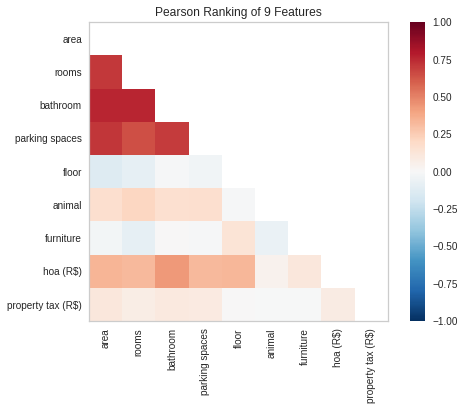

In [32]:
from yellowbrick.features import Rank2D

# Define method

correlation = Rank2D(algorithm='pearson')

# Fitting function
correlation.fit(X, y)
correlation.transform(X)
correlation.show();

<br>
<font color= 'blue' style='font-size: 20px'>1.4.5 Preparing data for model</font>
<hr style = 'border: 1px solid blue'>

## Separating data between train and test

In [33]:
from sklearn.model_selection import train_test_split

# division of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print(f'Train data: {X_train.shape}')
print(f'Test data:  {X_test.shape}')

Train data: (4116, 9)
Test data:  (1764, 9)


## Feature more relevants

In [34]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

def features_selection(x_train, y_train): 
    
    # Setting for select features
    selection = SelectKBest(score_func=mutual_info_regression, k = 'all')
    
    # Fitting
    selection.fit(X_train, y_train)
    
    return selection


# Apply function
scores = features_selection(X_train, y_train)

# Analyze 

for position, score in enumerate(scores.scores_):
    print(f'{X_train.columns[position]} : {score}')

area : 0.31922078915922736
rooms : 0.24020721825140567
bathroom : 0.3059074534909709
parking spaces : 0.25848075322040387
floor : 0.034063758680263234
animal : 0.015216408587055419
furniture : 0.0490806518101925
hoa (R$) : 0.1514034886651472
property tax (R$) : 0.01613033311513279


> <strong>mutual_info_regression:</strong> Evaluate the two variables dependence
<br>
> <strong>SelectKBest:</strong> Select the best features

In [35]:
### Dropping "property tax (R$)" column because your score was 0.0

In [36]:
X.drop(['property tax (R$)'], axis = 1, inplace = True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print(f'Train data: {X_train.shape}')
print(f'Test data:  {X_test.shape}')

Train data: (4116, 8)
Test data:  (1764, 8)


<br>
<font color= 'red' style='font-size: 30px'>1.5 Building Model</font>
<hr style = 'border: 1px solid red'>

In [38]:
from sklearn.ensemble import RandomForestRegressor

# Model Instance
model = RandomForestRegressor(max_depth=5)

# Fitting model
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

## Evaluate model

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

predictions = model.predict(X_test)

# Evaluating model
print(f'RMSE: {sqrt(mean_squared_error(y_test, predictions))}')
print(f'Score: {r2_score(y_test, predictions)}')

RMSE: 2297.042989771488
Score: 0.5672090596017467


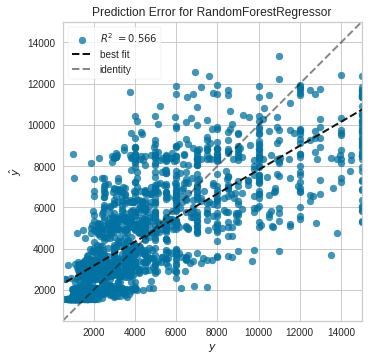

In [40]:
# Evaluating with yellowbrick
from yellowbrick.regressor import PredictionError

model = RandomForestRegressor(max_depth=5) 
model_error = PredictionError(model)

model_error.fit(X_train, y_train)
model_error.score(X_test, y_test)
model_error.show();

<br>
<font color= 'blue' style='font-size: 20px'>1.5.1 Exporting model</font>
<hr style = 'border: 1px solid blue'>

In [41]:
import joblib

joblib.dump(model, 'Random_Forest_Model_v1.pk1')

['Random_Forest_Model_v1.pk1']

## Testing trained model

In [42]:
model_loaded = joblib.load('Random_Forest_Model_v1.pk1')

In [43]:
model_loaded

RandomForestRegressor(max_depth=5)